### **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

**Insight:**


*  `pandas`, `numpy`: Untuk mengolah dan menghitung data (seperti tabel).
* `matplotlib.pyplot`, `seaborn`: Untuk membuat grafik
dan visualisasi data.
* `joblib`: Untuk menyimpan dan memuat model atau objek Python lainnya.
* `sklearn.model_selection.train_test_split`: Untuk membagi data menjadi data latih dan data uji.
* `sklearn.model_selection.GridSearchCV`: (Meskipun diimpor, kode yang ditampilkan tidak menggunakannya) Biasanya untuk mencari pengaturan terbaik (parameter) untuk model.
* `sklearn.preprocessing.StandardScaler`: Untuk menstandarkan data numerik (membuat nilainya rata-rata 0).
* `sklearn.preprocessing.LabelEncoder`: Untuk mengubah data teks menjadi angka.
* `imblearn.over_sampling.SMOTE`: Untuk menyeimbangkan jumlah data antar kategori (misalnya, jumlah penderita dan non-penderita diabetes).
* `sklearn.ensemble.RandomForestClassifier`: Model machine learning yang akan digunakan untuk prediksi.
* `sklearn.metrics.classification_report`, `accuracy_score`, `confusion_matrix`: Alat untuk mengukur seberapa baik kinerja model.



### **Data Understanding**

### **Load Dataset**

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
# Meninjau fitur-fitur dalam dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


**Insight:**

Berdasarkan data statistik deskriptif tersebut, terdapat outlier pada kolom `age` = 0.08 dan `bmi` = 95.69.

In [5]:
# Menampilkan jumlah baris dan kolom
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 100000
Jumlah kolom: 9


In [6]:
# Mengecek missing value dataset menggunakan isnull().sum()
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [7]:
# Mengecek duplikasi dataset menggunakan duplicated().sum()
print('Jumlah data duplikat:', df.duplicated().sum())

Jumlah data duplikat: 3854


In [8]:
# Mengecek data outlier
# Usia terlalu kecil (misalnya < 1 tahun)
anomali_usia = df[df['age'] < 1]
print(f"Jumlah data dengan usia < 1 tahun: {len(anomali_usia)}")

# BMI yang tidak realistis (misalnya < 10 atau > 60)
anomali_bmi = df[(df['bmi'] < 10) | (df['bmi'] > 60)]
print(f"Jumlah data dengan BMI tidak wajar: {len(anomali_bmi)}")

# HbA1c level yang sangat ekstrem (misalnya < 3 atau > 15)
anomali_hba1c = df[(df['HbA1c_level'] < 3) | (df['HbA1c_level'] > 15)]
print(f"Jumlah data dengan HbA1c_level tidak wajar: {len(anomali_hba1c)}")

# Blood glucose level sangat rendah atau tinggi (misalnya < 50 atau > 300)
anomali_glukosa = df[(df['blood_glucose_level'] < 50) | (df['blood_glucose_level'] > 300)]
print(f"Jumlah data dengan blood_glucose_level tidak wajar: {len(anomali_glukosa)}")

Jumlah data dengan usia < 1 tahun: 911
Jumlah data dengan BMI tidak wajar: 115
Jumlah data dengan HbA1c_level tidak wajar: 0
Jumlah data dengan blood_glucose_level tidak wajar: 0


### **EDA**

/tmp/ipython-input-9-2401563660.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diabetes', data=df, palette='viridis')


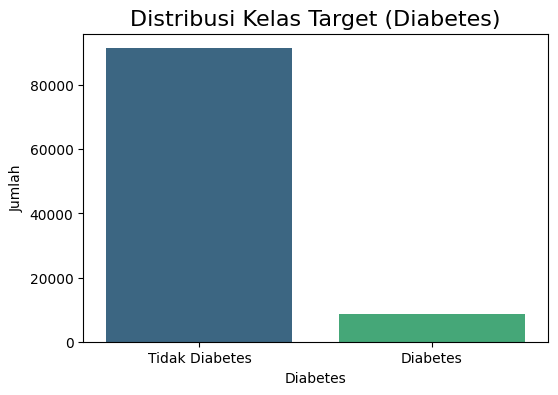


Persentase Distribusi Kelas Target:


,proportion
diabetes,
0,91.5
1,8.5


In [9]:
# Menampilkan distribusi kelas target
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=df, palette='viridis')
plt.title('Distribusi Kelas Target (Diabetes)', fontsize=16)
plt.xlabel('Diabetes')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['Tidak Diabetes', 'Diabetes'])
plt.show()

# Menghitung persentase distribusi kelas
class_distribution = df['diabetes'].value_counts(normalize=True) * 100
print("\nPersentase Distribusi Kelas Target:")
class_distribution

/tmp/ipython-input-10-3665112953.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='viridis')


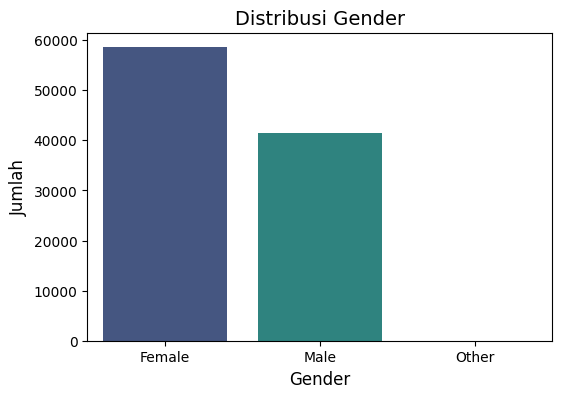

/tmp/ipython-input-10-3665112953.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='smoking_history', palette='viridis')


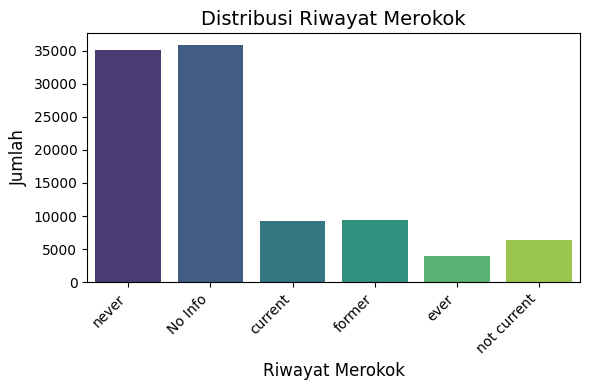

In [10]:
# Visualisasi untuk kolom 'gender'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', palette='viridis')
plt.title('Distribusi Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

# Visualisasi untuk kolom 'smoking_history'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='smoking_history', palette='viridis')
plt.title('Distribusi Riwayat Merokok', fontsize=14)
plt.xlabel('Riwayat Merokok', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:**

Berdasarkan visualisasi tersebut, jumlah female lebih banyak dibanding male pada dataset ini. Selain itu, pada distribusi riwayat merokok yaitu No Info dan never memiliki jumlah tertinggi.

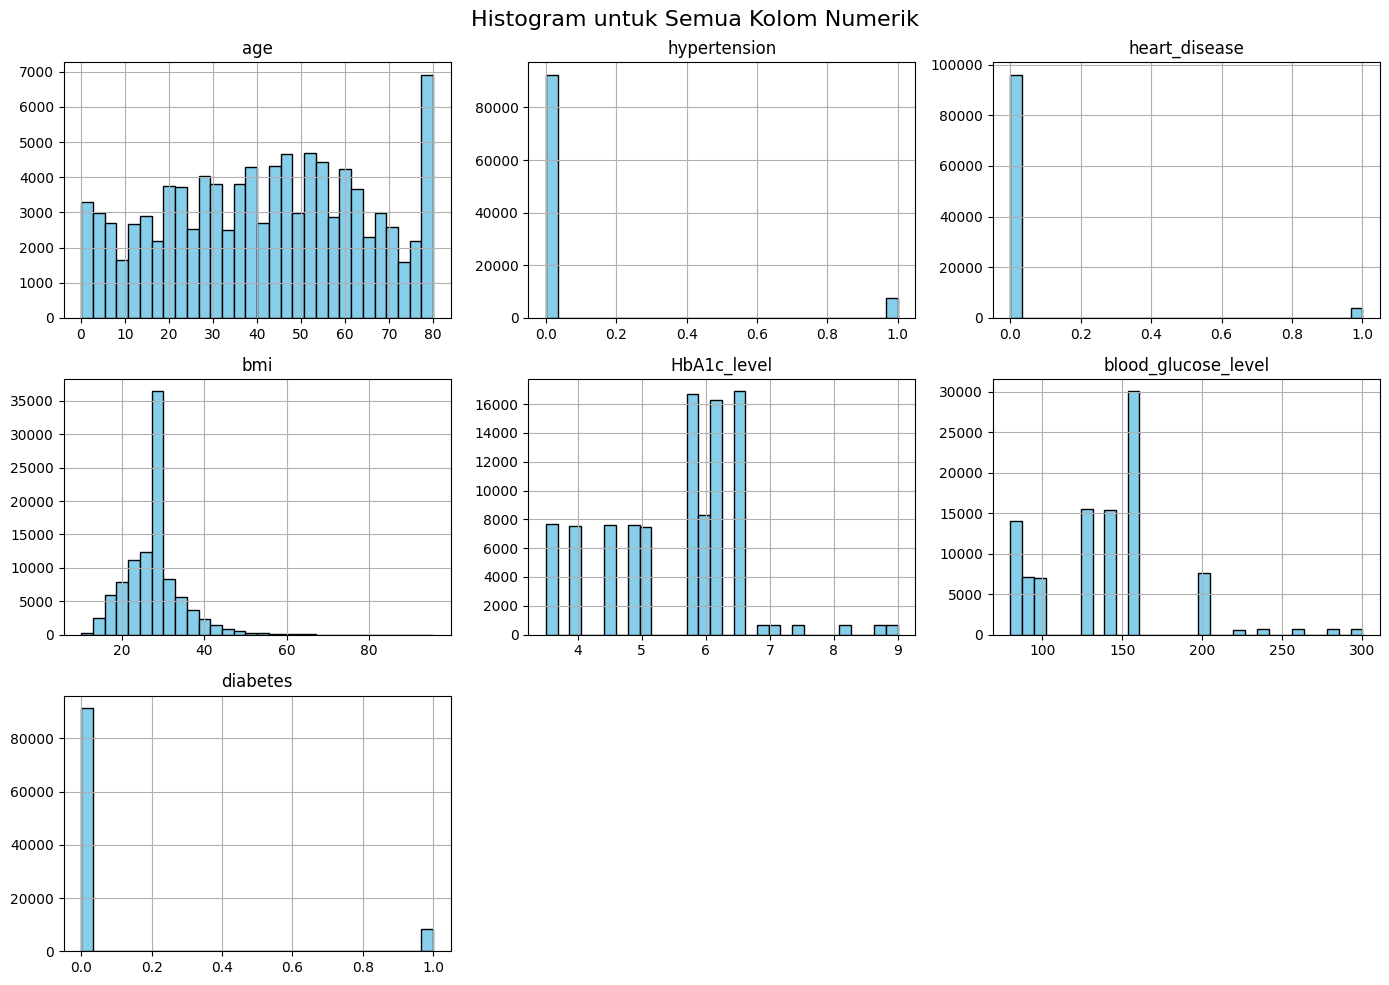

In [11]:
# Menampilkan histogram untuk semua kolom numerik
# Pilih hanya kolom numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Plot histogram untuk semua kolom numerik
numeric_columns.hist(bins=30, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histogram untuk Semua Kolom Numerik", fontsize=16)
plt.tight_layout()
plt.show()

**Insight:**

* `age`: Distribusi cukup merata dengan puncak di sekitar usia 70-80 tahun. Terdapat outlier ekstrem dengan usia di bawah 1 tahun.
* `hypertension` dan `heart_disease`: Datanya tidak seimbang dengan mayoritas 0 (tidak memiliki riwayat).
* `bmi`: Distribusi positively skewed (condong ke kanan), dengan satu puncak tajam.
* `HbA1c_level`: Distribusi cenderung normal dengan puncak di sekitar 6.0–6.5.
* `blood_glucose_level`: Distribusi tidak normal, dengan lonjakan pada kisaran 140–160.
* `diabetes`: Sangat imbalanced, kelas 0 (non-diabetes) jauh lebih banyak dari kelas 1 (diabetes).



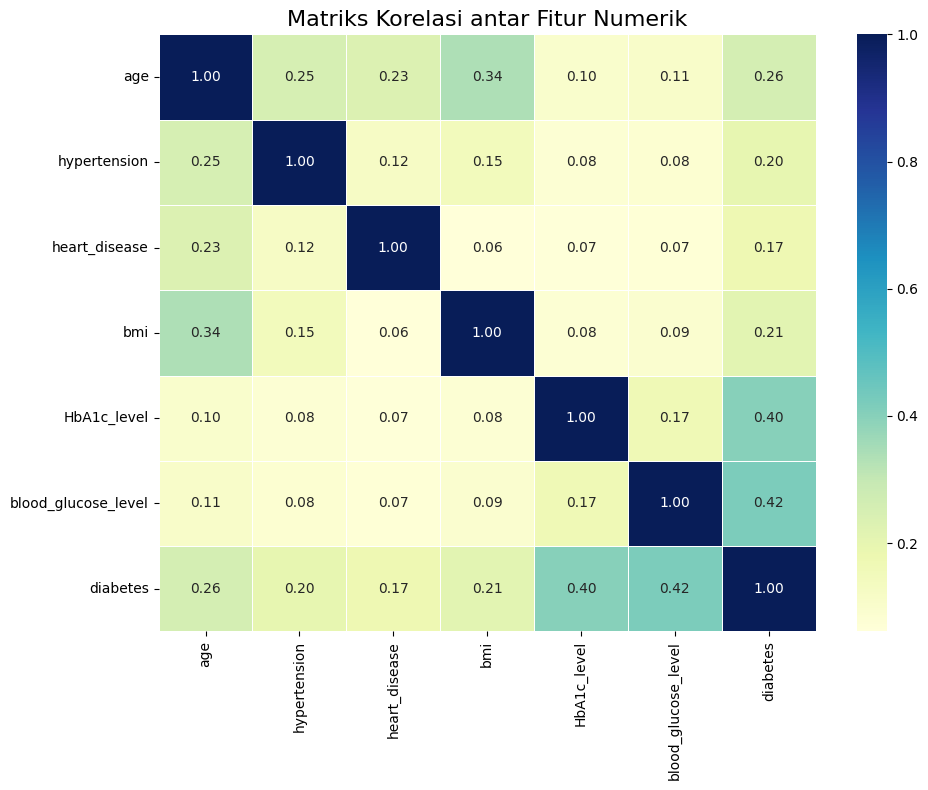

In [12]:
# Menampilkan korelasi antar fitur
# Hitung korelasi antar fitur numerik
correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi antar Fitur Numerik", fontsize=16)
plt.tight_layout()
plt.show()

**Insight:**

Berdasarkan heatmap korelasi fitur numerik terhadap target `diabetes`, dapat diamati bahwa fitur `blood_glucose_level` dan `HbA1c_level` memiliki korelasi tertinggi yaitu 0.42 dan 0.40. Selain itu, beberapa fitur lain seperti `age`, `bmi`, `hypertension`, dan `heart_disease` punya kontribusi yang lebih kecil, tapi tetap informatif.

### **Data Preparation**

In [13]:
# Mengubah tipe data kolom 'age' menjadi integer
df['age'] = df['age'].astype(int)

# Menampilkan info terbaru untuk memastikan perubahan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int64  
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 6.9+ MB


In [14]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates(inplace=True)

print('Jumlah data duplikat setelah dihapus:', df.duplicated().sum())

Jumlah data duplikat setelah dihapus: 0


In [15]:
# Menampilkan jumlah baris dan kolom setelah menghapus data duplikat
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 96112
Jumlah kolom: 9


In [16]:
# Menampilkan jumlah penderita dan non-penderita diabetes
diabetic_count = df[df['diabetes'] == 1].shape[0]
non_diabetic_count = df[df['diabetes'] == 0].shape[0]

print(f"Jumlah penderita diabetes: {diabetic_count}")
print(f"Jumlah non-penderita diabetes: {non_diabetic_count}")


Jumlah penderita diabetes: 8482
Jumlah non-penderita diabetes: 87630


In [18]:
# Menghapus baris dengan usia di bawah 1 tahun
df = df[df['age'] >= 1].copy()

print(f"Jumlah data setelah menghapus usia di bawah 1 tahun: {df.shape[0]}")

Jumlah data setelah menghapus usia di bawah 1 tahun: 95212


In [19]:
# Menghitung batas IQR untuk fitur 'bmi'
Q1_bmi = df['bmi'].quantile(0.25)
Q3_bmi = df['bmi'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi

lower_bound_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi

print(f"Q1 (BMI): {Q1_bmi}")
print(f"Q3 (BMI): {Q3_bmi}")
print(f"IQR (BMI): {IQR_bmi}")
print(f"Batas Bawah Outlier (BMI): {lower_bound_bmi}")
print(f"Batas Atas Outlier (BMI): {upper_bound_bmi}")

# Menemukan baris yang dianggap outlier berdasarkan IQR
outliers_bmi = df[(df['bmi'] < lower_bound_bmi) | (df['bmi'] > upper_bound_bmi)]
print(f"\nJumlah outlier pada fitur BMI (berdasarkan IQR): {len(outliers_bmi)}")

# Menghapus baris yang dianggap outlier pada fitur 'bmi'
df = df[~((df['bmi'] < lower_bound_bmi) | (df['bmi'] > upper_bound_bmi))].copy()

print(f"Jumlah data setelah menghapus outlier BMI (berdasarkan IQR): {df.shape[0]}")

Q1 (BMI): 23.55
Q3 (BMI): 29.93
IQR (BMI): 6.379999999999999
Batas Bawah Outlier (BMI): 13.980000000000002
Batas Atas Outlier (BMI): 39.5

Jumlah outlier pada fitur BMI (berdasarkan IQR): 5385
Jumlah data setelah menghapus outlier BMI (berdasarkan IQR): 89827


In [20]:
# Menghapus 'Other' pada kolom gender
df = df[df['gender'] != 'Other']
print(df['gender'].value_counts())

gender
Female    52010
Male      37799
Name: count, dtype: int64


### Encoding

In [21]:
categorical_cols = ['gender', 'smoking_history']
le = LabelEncoder()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Menampilkan 5 baris pertama setelah encoding
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,4,25.19,6.6,140,0
1,0,54,0,0,0,27.32,6.6,80,0
2,1,28,0,0,4,27.32,5.7,158,0
3,0,36,0,0,1,23.45,5.0,155,0
4,1,76,1,1,1,20.14,4.8,155,0


In [22]:
for col in ['gender', 'smoking_history']:
    print(f"\nMapping untuk kolom '{col}':")
    # Menggunakan label_encoders yang sudah dibuat sebelumnya
    le = label_encoders[col]
    # Mendapatkan mapping dari encoder
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    for original_value, encoded_value in mapping.items():
        print(f"'{original_value}' -> {encoded_value}")


Mapping untuk kolom 'gender':
'Female' -> 0
'Male' -> 1

Mapping untuk kolom 'smoking_history':
'No Info' -> 0
'current' -> 1
'ever' -> 2
'former' -> 3
'never' -> 4
'not current' -> 5


In [24]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Menerapkan SMOTE untuk menyeimbangkan data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menampilkan jumlah penderita diabetes setelah SMOTE
print(f"Jumlah penderita diabetes setelah SMOTE: {sum(y_resampled)}")
print(f"Jumlah non-penderita diabetes setelah SMOTE: {len(y_resampled) - sum(y_resampled)}")

Jumlah penderita diabetes setelah SMOTE: 82606
Jumlah non-penderita diabetes setelah SMOTE: 82606


In [25]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data test: {X_test.shape[0]}")
print(f"Jumlah seluruh data setelah SMOTE: {X_resampled.shape[0]}")

Jumlah data training: 132169
Jumlah data test: 33043
Jumlah seluruh data setelah SMOTE: 165212


### Normalisasi

In [26]:
# Mengidentifikasi kolom numerik untuk normalisasi
numeric_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Menginisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Menerapkan normalisasi hanya pada data latih (fit_transform)
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Menerapkan normalisasi pada data uji menggunakan scaler yang sama (transform)
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

### **Modeling**

In [29]:
# Membuat dan melatih model Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)  # Menggunakan data latih setelah SMOTE

RandomForestClassifier(random_state=42)

### **Evaluation**

In [30]:
# Melakukan prediksi pada data uji
y_pred = model_rf.predict(X_test)

# Mengevaluasi model
print(classification_report(y_test, y_pred))
print("Akurasi:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     16369
           1       0.97      0.98      0.97     16674

    accuracy                           0.97     33043
   macro avg       0.97      0.97      0.97     33043
weighted avg       0.97      0.97      0.97     33043

Akurasi: 0.9742759434676028


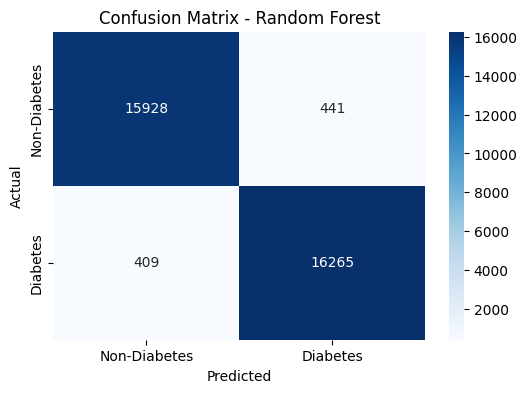

In [31]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi dengan heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetes', 'Diabetes'], yticklabels=['Non-Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### **Inference**

In [35]:
# Input data for inference
input_data = {
    'gender': 'Female',
    'age': 44,
    'hypertension': 0,
    'heart_disease': 0,
    'smoking_history': 'never',
    'bmi': 19.31,
    'HbA1c_level': 6.5,
    'blood_glucose_level': 200
}

input_df = pd.DataFrame([input_data])

# Ensure the input DataFrame has the same columns and order as the training data X
input_df = input_df[X.columns]

# Use the pre-fitted LabelEncoders from the training phase
# The 'label_encoders' dictionary was created during data preparation
input_df['gender'] = label_encoders['gender'].transform(input_df['gender'])
input_df['smoking_history'] = label_encoders['smoking_history'].transform(input_df['smoking_history'])

# Identify numeric columns (ensure this list matches the one used during training)
numeric_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Use the pre-fitted scaler from the training phase
input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])

# Make predictions
prediction = model_rf.predict(input_df)

# Print the prediction (0 for non-diabetic, 1 for diabetic)
print("Prediction:", prediction)

if prediction[0] == 1:
    print("Diprediksi Diabetes")
else:
    print("Diprediksi Non-Diabetes")

Prediction: [1]
Diprediksi Diabetes


In [36]:
# Menyimpan model
joblib.dump(label_encoders['gender'], 'le_gender.joblib')
joblib.dump(label_encoders['smoking_history'], 'le_smoking.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(model_rf, "model_diabetes.joblib")


['model_diabetes.joblib']